# Naive Bayes 

In [34]:
# Importing the libraries
import pandas as pd

In [35]:
# To read excel  file
df =pd.read_excel("D:\DATA SCIENCE\ML\Practice ML\Titanic.xlsx")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
# To remove column (not important for prediction)
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace =True)
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [38]:
# To check information of above dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [39]:
# To check null values and it's sum
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [40]:
# To remove null cell in Embarked column
df.dropna(subset=['Embarked'],inplace=True)
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [78]:
# To find mean of Age column
x=df['Age'].mean()
round(x)
print("mean of Age = ",round(x))

mean of Age =  30


In [65]:
# To replace blank value with age mean
df['Age']=df['Age'].fillna(round(x))
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [43]:
# To check null values and it's sum (now i have no any blank values)
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [44]:
# This is my updated dataset
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [66]:
# Use get_dummies
final=pd.get_dummies(data = df,columns= ['Sex','Embarked'],drop_first = True)
final.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1


In [47]:
X = final.drop('Survived',axis=1)
y = final.Survived

In [48]:
# Import train_test_split from sklearn.model_selection 
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [69]:
# To check how maney samples in X_train
X_train.shape
print("X_train shape = ",X_train.shape)

# To check how maney samples in X_test
X_test.shape
print("X_test shape = ",X_test.shape)

X_train shape =  (711, 5)
X_test shape =  (178, 5)


 * Use naive bayes

In [71]:
# import Bernoulli from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB

# Create a model
model = BernoulliNB()

# To train model
model.fit(X_train, y_train)

BernoulliNB()

In [73]:
# if you pass new sample then check how accuracy you will get
# check score
model.score(X_test, y_test)
print("model score = ",model.score(X_test, y_test))

model score =  0.797752808988764


In [56]:
# To check first 5 values in X_test
X_test[:5]

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
281,3,28.0,1,0,1
435,1,14.0,0,0,1
39,3,14.0,0,0,0
418,2,30.0,1,0,1
585,1,18.0,0,0,1


In [57]:
# To check first 5 values in y_test
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [58]:
# prediction using bernoli NB
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [74]:
# Check score using Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)
print("nb score = ",nb.score(X_test,y_test))

nb score =  0.7808988764044944


In [75]:
# Check score using Gaussian NB
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(X_train,y_train)
mb.score(X_test,y_test)
print("mb score = ",mb.score(X_test,y_test))

mb score =  0.7078651685393258


Plot confusion matrix

In [61]:
predicted = model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
# To create a object for model
cm = confusion_matrix(y_test,predicted)

<AxesSubplot:>

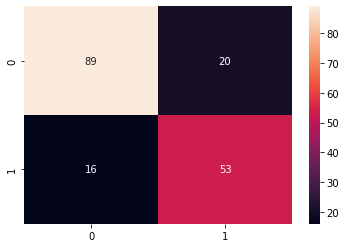

In [64]:
# Import seaborn for plotting heatmap
import seaborn as sns
sns.heatmap(cm,annot = True )